# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .evn environment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
response_data_btc = requests.get(btc_url)
data_btc = response_data_btc.json()
btc_price = data_btc['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
response_data_eth = requests.get(eth_url)
data_eth = response_data_eth.json()
eth_price = data_eth['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $15567.85
The current value of your 5.3 ETH is $2187.63


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_api_key_secret = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_api_key_secret,
    api_version = "v2"
)

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-23", tz = "America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
balanced_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
balanced_portfolio

AGG                                     SPY  \
                            open    high    low   close   volume    open   
2020-10-23 00:00:00-04:00  117.3  117.52  117.3  117.47  3482671  345.93   

                                                             
                             high     low   close    volume  
2020-10-23 00:00:00-04:00  345.99  343.13  345.76  38718140

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(balanced_portfolio['AGG']['close'])
spy_close_price = float(balanced_portfolio['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.47
Current SPY closing price: $345.76


In [10]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17288.00
The current value of your 200 AGG shares is $23494.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
shares_sum = my_agg_value + my_spy_value
crypto_sum = my_btc_value + my_eth_value
amount_data = {"amount": [crypto_sum, shares_sum]}
index_name = ["crypto", "shares"]
df_savings = pd.DataFrame(amount_data, index = index_name)

# Display savings DataFrame
display(df_savings)

,amount
crypto,17755.48
shares,40782.00


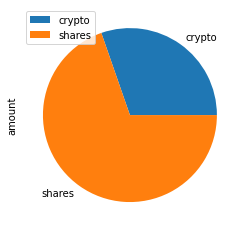

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y = 'amount')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = df_savings['amount'].sum()

# Validate saving health
if savings >= emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
    
else:
    print(f"You are ${emergency_fund-savings:.02f} from reaching the emergancy fund goal")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_df_stock_data = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [17]:
# Printing the simulation input data
MC_df_stock_data.portfolio_data.head()

AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_df_stock_data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010318,1.001985,1.004334,0.994199,1.009976,0.999633,0.997079,0.999178,1.001630,0.997553,...,0.998167,1.013463,1.016963,0.995607,1.010198,0.993918,0.987610,1.002571,0.987291,1.004960
2,1.030024,1.002355,1.011336,1.004408,1.012387,1.000828,1.002140,0.997752,0.997901,0.994929,...,1.000632,1.017017,1.020835,0.997051,1.018429,0.985066,0.980788,0.989801,0.977407,1.007323
3,1.041217,1.012502,1.014054,1.011421,1.004100,1.000837,1.012354,0.993028,1.006268,0.994324,...,1.005913,1.002991,1.032880,0.997431,1.034070,0.985918,0.979276,0.984376,0.978138,1.009453
4,1.035309,1.017994,1.015209,1.017649,0.998658,0.998066,1.014577,1.003541,1.006820,1.008316,...,1.000911,1.013151,1.033331,0.995949,1.023127,0.978967,0.987036,0.983758,0.976075,1.001601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,16.705313,9.758570,22.499152,11.705005,3.413024,6.452742,6.765453,8.817836,4.575552,20.744767,...,8.570418,6.281568,6.154593,15.814061,19.669439,6.025479,3.879212,2.623415,5.127852,4.143807
7557,16.869450,9.699873,22.721390,11.720157,3.383640,6.446374,6.815231,8.776727,4.595198,20.746392,...,8.576750,6.269357,6.185844,15.688353,19.898023,5.986919,3.861225,2.622029,5.082348,4.102870
7558,17.034713,9.603729,22.739389,11.666009,3.389379,6.418744,6.850319,8.825242,4.620589,20.661471,...,8.586771,6.347293,6.142823,15.653906,19.660074,6.063288,3.848003,2.609079,5.110381,4.065537
7559,17.194105,9.667796,22.831207,11.692756,3.353716,6.466794,6.929336,8.733690,4.650034,20.590980,...,8.571683,6.343095,6.140182,15.733605,19.926203,6.169769,3.820670,2.644570,5.105256,4.074631


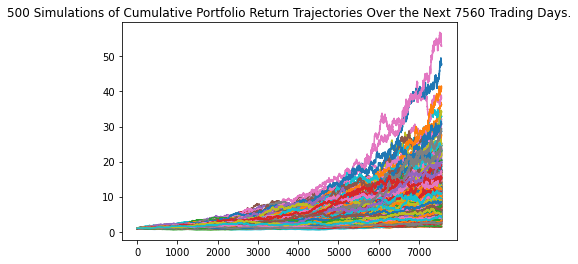

In [19]:
# Plot simulation outcomes
return_plot = MC_df_stock_data.plot_simulation()

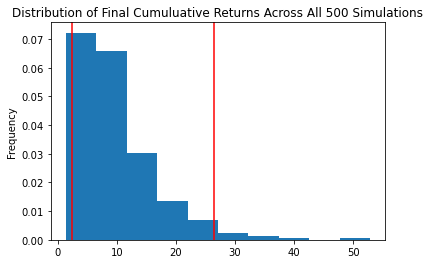

In [21]:
# Plot probability distribution and confidence intervals
return_dist_plot = MC_df_stock_data.plot_distribution()

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
return_even_tbl = MC_df_stock_data.summarize_cumulative_return()

# Print summary statistics
print(return_even_tbl)

count           500.000000
mean              9.853313
std               6.753247
min               1.346003
25%               5.274217
50%               8.332512
75%              12.411791
max              52.876258
95% CI Lower      2.456388
95% CI Upper     26.483310
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(return_even_tbl[8] * initial_investment, 2)
ci_upper = round(return_even_tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $49127.76 and $529666.19


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(return_even_tbl[8] * initial_investment, 2)
ci_upper = round(return_even_tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $73691.64 and $794499.29


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_df_stock_data_5_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252 * 5
)

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_df_stock_data_5_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.015854,1.010084,1.007022,0.997791,0.994989,0.995107,1.002697,0.994893,0.989519,1.005669,...,0.991524,1.003057,0.998583,1.002013,1.005305,1.017578,1.001835,0.987762,1.014427,1.012206
2,1.010735,1.009162,1.004761,0.999734,0.998324,1.000484,1.005484,0.990959,0.981355,1.003176,...,0.998157,1.010148,1.000391,0.999898,1.000056,1.028456,1.018881,0.984233,1.013286,1.013060
3,1.026843,1.025841,0.992698,0.992624,0.989733,0.992153,1.020041,0.990550,0.982158,1.003763,...,0.996585,1.007043,0.996836,1.007515,0.997809,1.035771,1.010370,0.984159,1.023993,1.025638
4,1.028608,1.028395,0.992348,0.991757,0.995704,0.995059,1.020331,0.992622,0.985562,1.006420,...,0.989172,1.000815,0.993875,0.989619,1.000538,1.042169,1.009356,0.979974,1.032913,1.012967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.457283,1.451255,1.317082,1.421902,1.453027,1.206833,1.204900,2.285509,1.006696,1.387161,...,1.755339,1.437010,0.654342,1.133267,1.675746,1.503687,1.248434,1.104685,1.264336,1.769209
1257,1.460180,1.469746,1.339420,1.417300,1.454123,1.207534,1.197927,2.307650,1.015366,1.391659,...,1.755307,1.450726,0.656255,1.126681,1.670579,1.509818,1.270042,1.117120,1.259554,1.783189
1258,1.460626,1.482744,1.357126,1.435434,1.450693,1.208587,1.207246,2.326435,1.023569,1.401841,...,1.765500,1.437858,0.663558,1.124076,1.648386,1.519350,1.264674,1.105525,1.275768,1.792432
1259,1.460364,1.455526,1.367035,1.448289,1.450513,1.220497,1.203719,2.319196,1.025131,1.400878,...,1.792644,1.445568,0.668369,1.129473,1.640899,1.511844,1.268792,1.106364,1.264789,1.784050


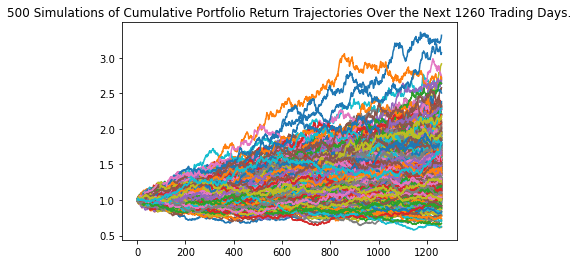

In [27]:
# Plot simulation outcomes
return_plot_5_year = MC_df_stock_data_5_year.plot_simulation()

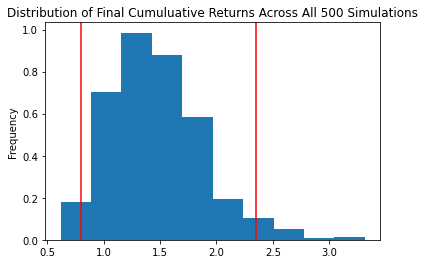

In [28]:
# Plot probability distribution and confidence intervals
return_dist_plot_5_year = MC_df_stock_data_5_year.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
return_even_tbl_5_year = MC_df_stock_data_5_year.summarize_cumulative_return()

# Print summary statistics
print(return_even_tbl_5_year)

count           500.000000
mean              1.467289
std               0.411307
min               0.616407
25%               1.169242
50%               1.425816
75%               1.708091
max               3.316855
95% CI Lower      0.797018
95% CI Upper      2.348562
Name: 1260, dtype: float64


In [31]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(return_even_tbl_5_year[8] * initial_investment, 2)
ci_upper_five = round(return_even_tbl_5_year[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $47821.06 and $140913.75


### Ten Years Retirement Option

In [33]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_df_stock_data_10_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

In [34]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_df_stock_data_10_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994463,1.001753,1.016889,0.994825,1.003284,1.002984,1.008480,0.983737,1.002155,0.996569,...,1.003647,1.001446,0.992902,0.990426,1.005200,0.997957,0.994692,0.999045,0.993707,1.001764
2,0.992626,1.005990,1.021325,0.988439,0.997700,1.008151,1.013044,0.981532,0.998745,1.013582,...,1.006425,0.986320,1.000956,0.985198,1.000233,0.996637,0.984463,0.992214,0.995310,0.994892
3,0.994928,1.007082,1.029712,0.988672,0.992137,0.999014,1.018770,0.968950,1.001964,1.017867,...,0.994483,0.988204,0.990763,0.981985,1.008817,1.001515,0.969471,0.983049,0.996825,0.990760
4,0.999745,1.007366,1.024055,0.991630,0.997476,0.997800,1.006720,0.965701,1.000626,1.017464,...,1.004493,0.982415,0.996539,0.980390,1.004421,0.994543,0.966421,0.980243,1.004154,0.985787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.789298,2.302640,1.409883,2.591407,1.769066,1.092581,2.220869,1.659860,1.198686,3.294457,...,2.133870,1.230023,2.487405,2.441088,2.560679,0.905238,2.120473,2.928060,4.267532,3.142803
2517,2.764748,2.310549,1.421961,2.559913,1.772376,1.095187,2.197587,1.638335,1.207110,3.275656,...,2.147460,1.214883,2.507558,2.460818,2.532271,0.897408,2.123296,2.909203,4.264694,3.136723
2518,2.763180,2.296726,1.408410,2.544810,1.794933,1.091241,2.189926,1.622977,1.197352,3.269703,...,2.169705,1.221266,2.487493,2.499240,2.523647,0.905101,2.139379,2.910930,4.259185,3.156128
2519,2.781163,2.300545,1.411701,2.571685,1.763992,1.088048,2.216447,1.640758,1.209786,3.303084,...,2.139157,1.221223,2.450992,2.485311,2.523735,0.897692,2.116760,2.948354,4.245545,3.173339


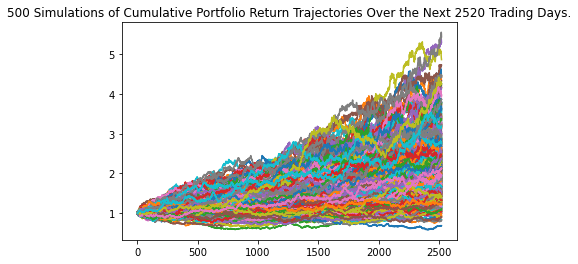

In [35]:
# Plot simulation outcomes
return_plot_10_year = MC_df_stock_data_10_year.plot_simulation()

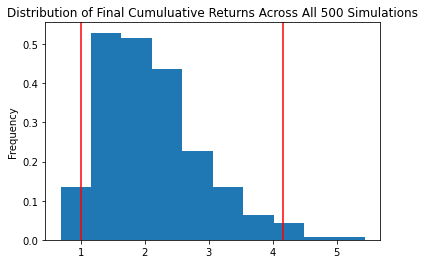

In [36]:
# Plot probability distribution and confidence intervals
return_dist_plot_10_year = MC_df_stock_data_10_year.plot_distribution()

In [37]:
# Fetch summary statistics from the Monte Carlo simulation results
return_even_tbl_10_year = MC_df_stock_data_10_year.summarize_cumulative_return()

# Print summary statistics
print(return_even_tbl_10_year)

count           500.000000
mean              2.119488
std               0.794867
min               0.681326
25%               1.526619
50%               1.985741
75%               2.533631
max               5.441681
95% CI Lower      1.002242
95% CI Upper      4.157708
Name: 2520, dtype: float64


In [38]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(return_even_tbl_10_year[8] * initial_investment, 2)
ci_upper_ten = round(return_even_tbl_10_year[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $60134.54 and $249462.45
